
<div class="usecase-title">Melbourne Social Trend Analysis</div>
<div class="usecase-authors">Author: Deepthi Reddy Thatipally</div>

<div class="usecase-level-skill">
  <div class="usecase-level">Level: Intermediate</div>
  <div class="usecase-skill">Skills: Python, Data Visualization</div>
</div>

<div class="usecase-duration">Duration: {90} minutes</div>
"""

<div class="usecase-scenario">
  <h2>Scenario</h2>
  <p>The City of Melbourne Social Indicators Survey (CoMSIS) has been conducted annually since 2018 to gather valuable insights into the health, well-being, safety, participation, and social connection of communities within the Melbourne Local Government Area. The survey is conducted through telephone and online channels, it supports the reporting of key municipal outcome indicators as outlined in the Council Plan 2021–2025. These indicators enable the council to assess the impact of existing initiatives and inform the planning of future programs. This use case focuses on analyzing multi-year CoMSIS data (2018–2023) to understand how community sentiment has evolved over time. By uncovering trends and highlighting both high- and low-performing indicators, the analysis provides evidence-based insights to help the City of Melbourne better prioritize and refine its community initiatives.</p>

<h2>What this Use Case will teach you</h2>
  <ul>
    <li>Export the dataset using API</li>
    <li>Data preprocessing</li>
    <li>Handling missing values</li>
    <li>Exploratory Data Analysis</li>
    <li>Identify trends and variations in key social indicators such as health, well-being, safety, participation, and social connection</li>
  </ul>
  <h2>Background/ Introduction</h2>
  <p>
    The City of Melbourne Social Indicators Survey (CoMSIS) was established in 2018 to provide a comprehensive view of the community’s well-being 
    within the Melbourne Local Government Area. Conducted annually through both telephone and online channels, the survey captures critical data 
    on health, well-being, safety, participation, and social connection. This rich dataset supports the reporting of key municipal outcome indicators 
    outlined in the Council Plan 2021–2025, serving as a vital tool for evaluating the impact of existing community initiatives and planning future programs.
  </p>
  <p>
    This use case focuses on analyzing multi-year CoMSIS data (2018–2023) to trace the evolution of community sentiment over time. By uncovering 
    trends and identifying both high- and low-performing indicators, the analysis aims to deliver evidence-based insights that will help the City 
    of Melbourne fine-tune its community initiatives. Ultimately, this approach not only enhances the understanding of community dynamics but also 
    informs strategic decision-making in local governance.
  </p>
</div>
"""

display(HTML(html_content))


<h1>Installing necessary libraries</h1>

In [1]:
! pip install requests pandas numpy geopandas scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.1 MB/s eta 0:00:00a 0:00:01


<h1>Importing the Libraries and downloading Dataset using API</h1>

In [95]:
import requests
import pandas as pd
from io import StringIO

def API_upload(dataset_id):
    
    core_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    file_format = 'csv'
    
    web_url = f'{core_url}{dataset_id}/exports/{file_format}'
    
    params = {
        'select': '*',     
        'timezone': 'UTC', 
        'lang': 'en',      
        'limit': '-1'      
    }
    
    response = requests.get(web_url, params=params)
    
    if response.status_code == 200:
        csv_content = response.content.decode('utf-8')
        try:
            df_dataset = pd.read_csv(StringIO(csv_content), delimiter=';')
        except Exception as e:
            print("Semicolon delimiter failed, trying comma delimiter.")
            df_dataset = pd.read_csv(StringIO(csv_content))
        
        print(f"\nDataset: {dataset_id}\n")
        print(df_dataset.head())
        print(f"\nTotal records: {len(df_dataset)}")
        return df_dataset
    else:
        print(f"Error fetching data from {web_url}: {response.status_code}")
        return None

# Dataset ID for Social Indicators 
dataset_id = 'social-indicators-for-city-of-melbourne-residents-2023'
df = API_upload(dataset_id)



Dataset: social-indicators-for-city-of-melbourne-residents-2023

  indicator   type   topic        description  \
0        18  Other  Health  Smoking behaviour   
1        18  Other  Health  Smoking behaviour   
2        18  Other  Health  Smoking behaviour   
3        19  Other  Health   Vaping behaviour   
4        19  Other  Health   Vaping behaviour   

                                         response  \
0  Reported as smoke daliy or smoke occassionally   
1  Reported as smoke daliy or smoke occassionally   
2  Reported as smoke daliy or smoke occassionally   
3    Reported as vape daliy or vape occassionally   
4    Reported as vape daliy or vape occassionally   

                                  respondent_group  year  sample_size  result  \
0                                             Male  2023          569    18.0   
1                     Kensington / Flemington 3031  2023           89    16.4   
2  South Yarra 3141 / Melbourne/St Kilda Road 3004  2023          138    12.2

<h1>Cleaning the columns</h1>

In [97]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace(r'\W+', '', regex=True)
)
print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['indicator', 'type', 'topic', 'description', 'response',
       'respondent_group', 'year', 'sample_size', 'result', 'format'],
      dtype='object')


In the above code we are cleaning the columns and removing unnecesary whitespaces and then converting them to lowercases. Replacing spaces with underscores for the columns, removing alpha-numeric characters.

<h1>Deleting Duplicate Rows</h1>

In [99]:
df = df.drop_duplicates()
print("Duplicates removed. New DataFrame shape:", df.shape)

Duplicates removed. New DataFrame shape: (594, 10)


This step deletes all the duplicate rows in the dataset

<h1>Handling Missing Values</h1>

In [101]:
missing_threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=missing_threshold)
print("Columns after dropping those with >50% missing values:")
print(df.columns)

Columns after dropping those with >50% missing values:
Index(['indicator', 'type', 'topic', 'description', 'response',
       'respondent_group', 'year', 'sample_size', 'result', 'format'],
      dtype='object')


Deleteing the columns which has more tha 50% missing values, tio achieve that we are setting the threshold to >50%

<h1>Filling The Missing Values</h1>

In [103]:
# For numeric columns, fill missing values with the median.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill missing values with the mode (if available).
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values imputed for numeric and categorical columns.")


Missing values imputed for numeric and categorical columns.


For numeric columns, I tried using median to fill the missing values, whereas for the categorical columns, I used mode to fill the missing values.

<h1>Numeric Conversions</h1>

In [105]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        # If conversion fails, leave the column unchanged
        continue

print("Attempted numeric conversion for all applicable columns.")

Attempted numeric conversion for all applicable columns.


If the column seems to be numeric but are stored as a string are being converted into numeric, if the conversion fails we leave the column unchanged in its intial position.

In [107]:
# Parse columns with 'date' or 'time' in their name as datetime
for col in df.columns:
    if "date" in col or "time" in col:
        try:
            df[col] = pd.to_datetime(df[col])
        except Exception:
            # If conversion to datetime fails, keep the column unchanged.
            continue

print("Parsed date/time columns where possible.")

Parsed date/time columns where possible.


<h1>Displaying the processed DataFrame</h1>

In [109]:
# Display DataFrame information and the first few rows
print("Final DataFrame Info:")
print(df.info())

print("\nFirst few rows of the processed DataFrame:")
print(df.head())


Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indicator         594 non-null    object 
 1   type              594 non-null    object 
 2   topic             594 non-null    object 
 3   description       594 non-null    object 
 4   response          594 non-null    object 
 5   respondent_group  594 non-null    object 
 6   year              594 non-null    int64  
 7   sample_size       594 non-null    int64  
 8   result            594 non-null    float64
 9   format            594 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 46.5+ KB
None

First few rows of the processed DataFrame:
  indicator   type   topic        description  \
0        18  Other  Health  Smoking behaviour   
1        18  Other  Health  Smoking behaviour   
2        18  Other  Health  Smoking behaviour   
3

Displaying the first few rows of the dataframe

In [111]:
df.head(5)

,indicator,type,topic,description,response,respondent_group,year,sample_size,result,format
0,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Male,2023,569,18.0,Per cent
1,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Kensington / Flemington 3031,2023,89,16.4,Per cent
2,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,South Yarra 3141 / Melbourne/St Kilda Road 3004,2023,138,12.2,Per cent
3,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,35-44 years,2023,228,5.5,Per cent
4,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,45-54 years,2023,128,8.1,Per cent


In [113]:
df.describe

<bound method NDFrame.describe of     indicator   type                 topic                        description  \
0          18  Other                Health                  Smoking behaviour   
1          18  Other                Health                  Smoking behaviour   
2          18  Other                Health                  Smoking behaviour   
3          19  Other                Health                   Vaping behaviour   
4          19  Other                Health                   Vaping behaviour   
..        ...    ...                   ...                                ...   
589        8g  Other  Subjective wellbeing  Satisfaction with future security   
590         9  Other       Quality of life  Satisfaction with life as a whole   
591         9  Other       Quality of life  Satisfaction with life as a whole   
592         9  Other       Quality of life  Satisfaction with life as a whole   
593         9  Other       Quality of life  Satisfaction with life as a who

<h1>Importing Libraries</h1>

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing required libraries for analysis and data visualizations through plotting.

<h1>Distribution of Numeric Features</h1>

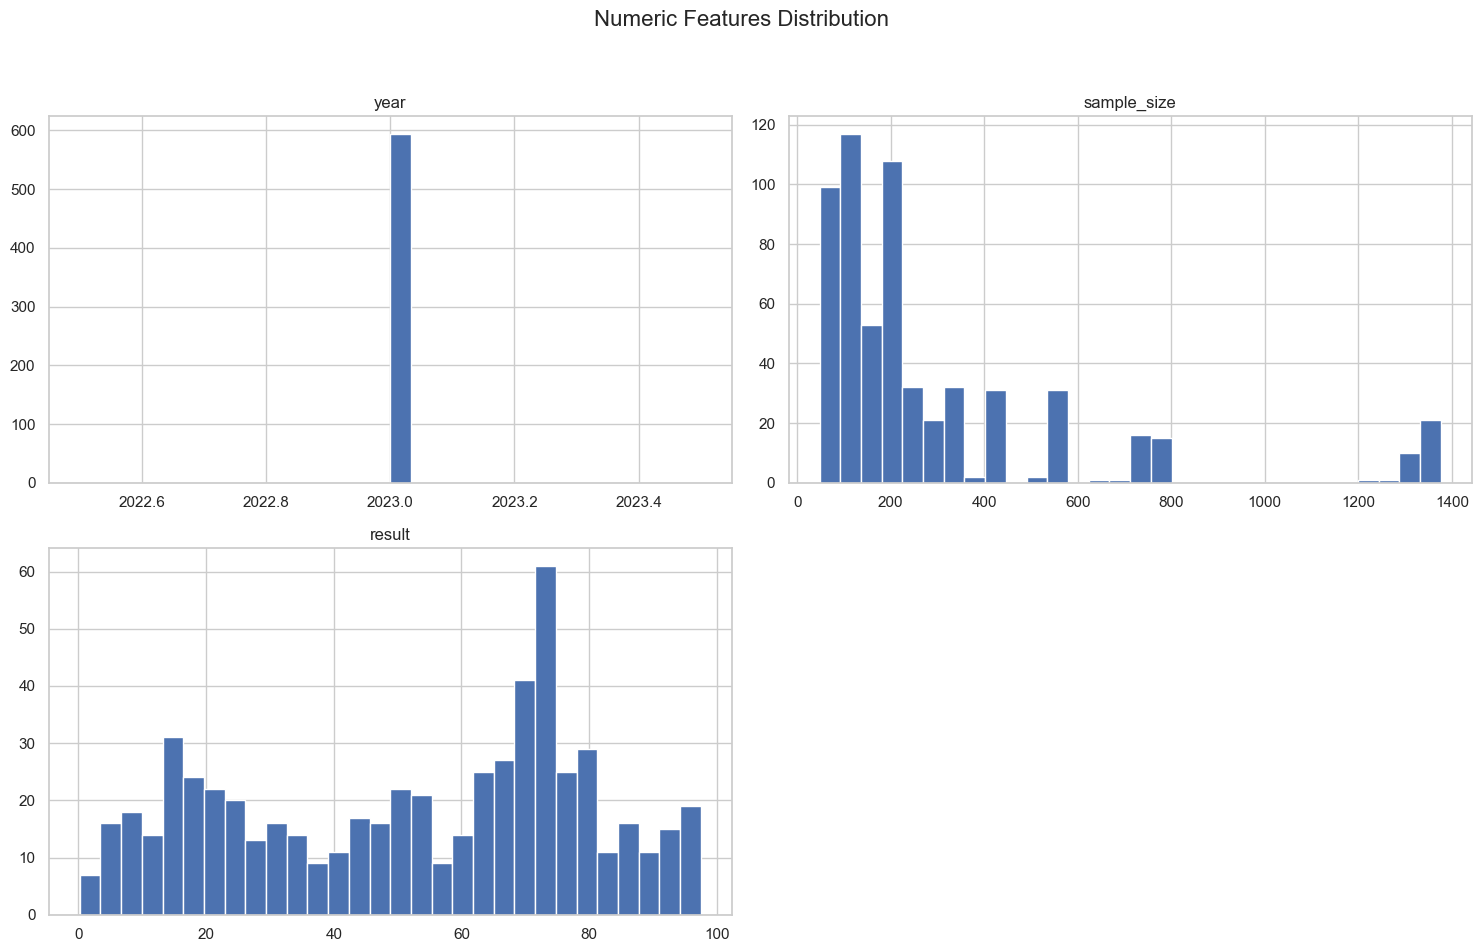

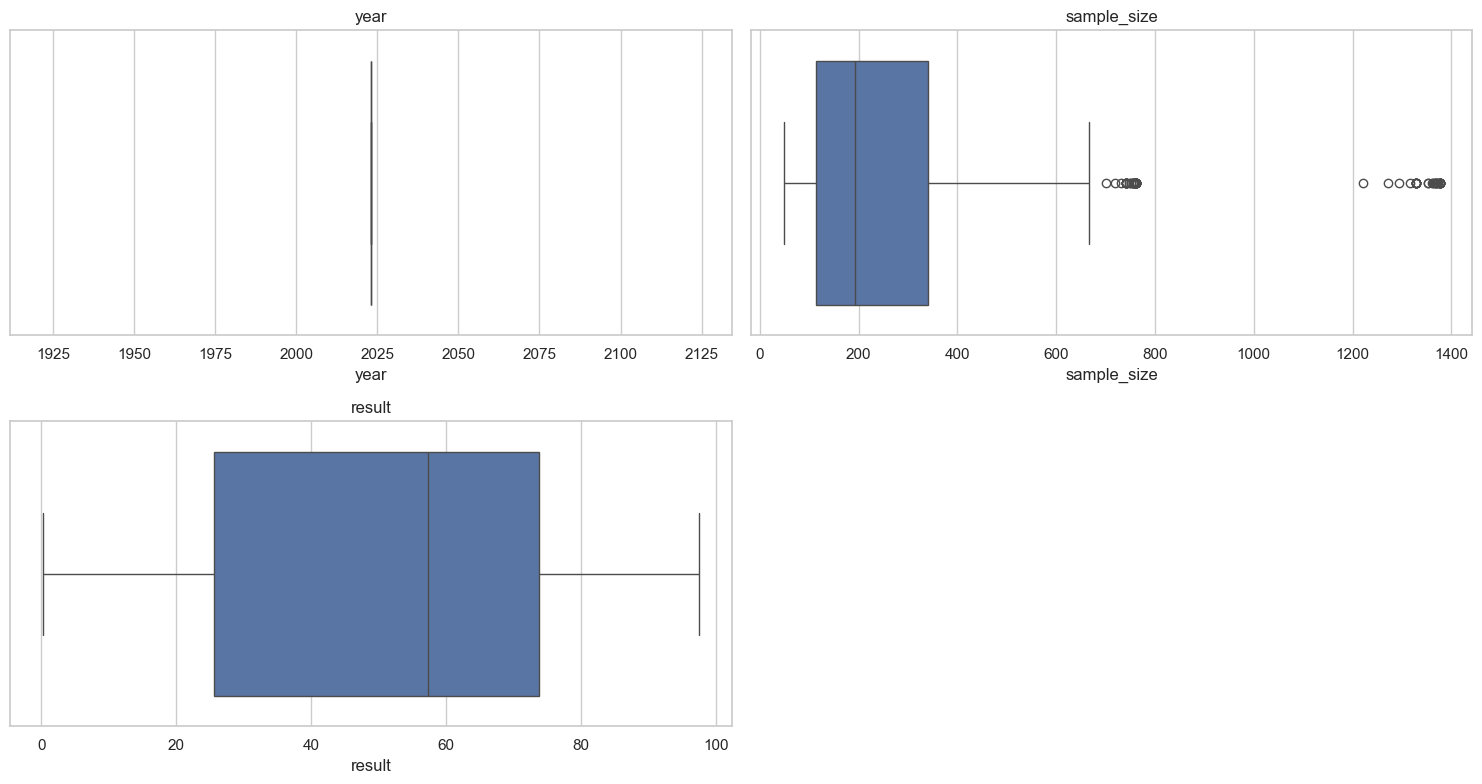

In [233]:
# Plot histograms for numeric columns to see their distributions
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Numeric Features Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Optionally, show boxplots to check for outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


This code first selects all numeric columns (int64 and float64) and creates histograms (with 30 bins) for each to show their distributions, adding an overall title and ensuring neat spacing with `tight_layout()`. Then it creates boxplots for each numeric column arranged in a grid (2 rows) to visually highlight medians, spreads, and potential outliers, again using `tight_layout()` for clean formatting.

<h1>Correlation Analysis and Correlation Matrix</h1>

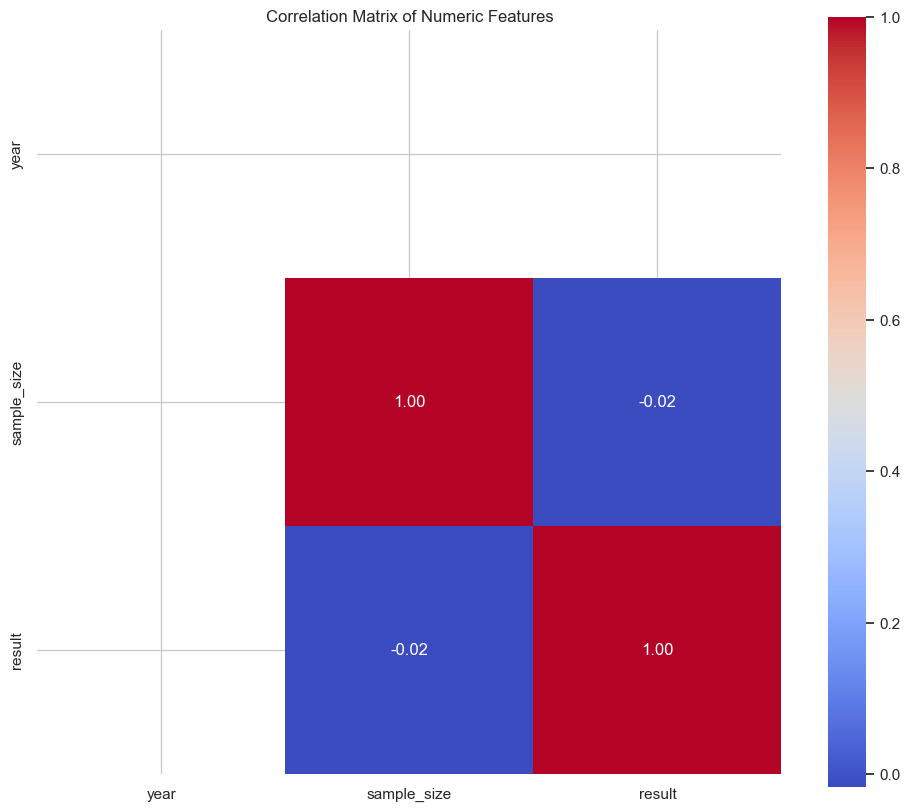

In [235]:
corr_matrix = df[numeric_cols].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

This code first selects all numeric columns from the DataFrame and computes their pairwise Pearson correlation, creating a correlation matrix. It then creates a 12×8 inch figure and uses Seaborn's heatmap function to visually represent the correlation matrix, with each cell annotated with the corresponding correlation value (formatted to two decimals) and colored using the "YlGnBu" colormap. Finally, it sets an overall title, adjusts the layout for proper spacing, and displays the plot.

<h1>Top 10 categories for Each Categorical Column</h1>

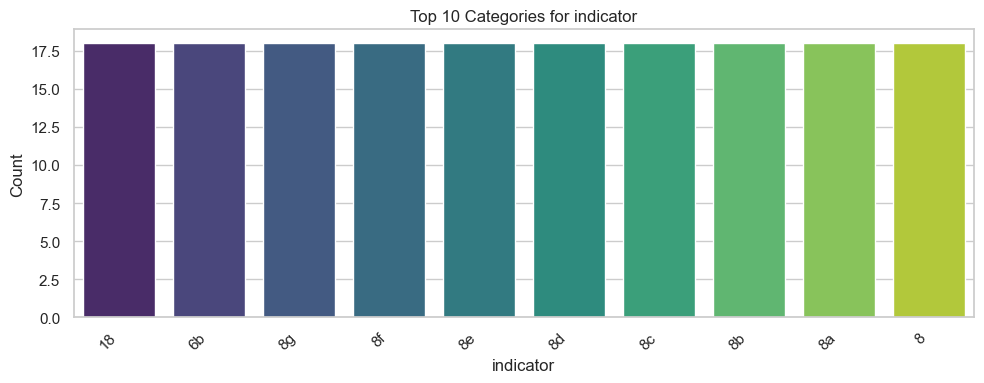

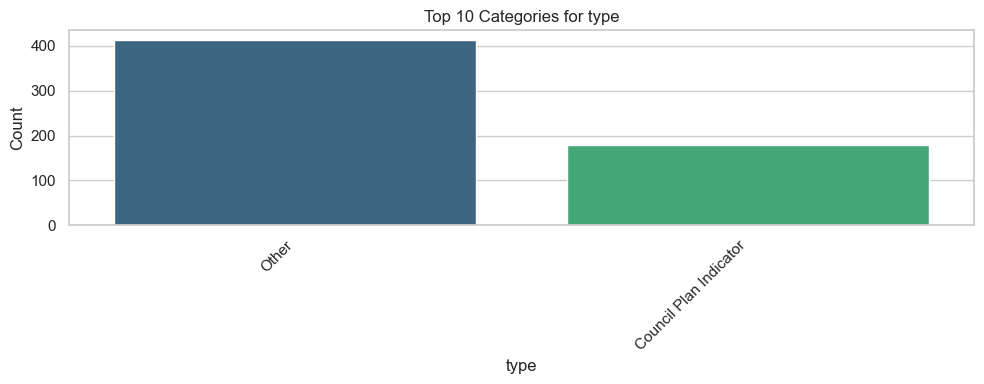

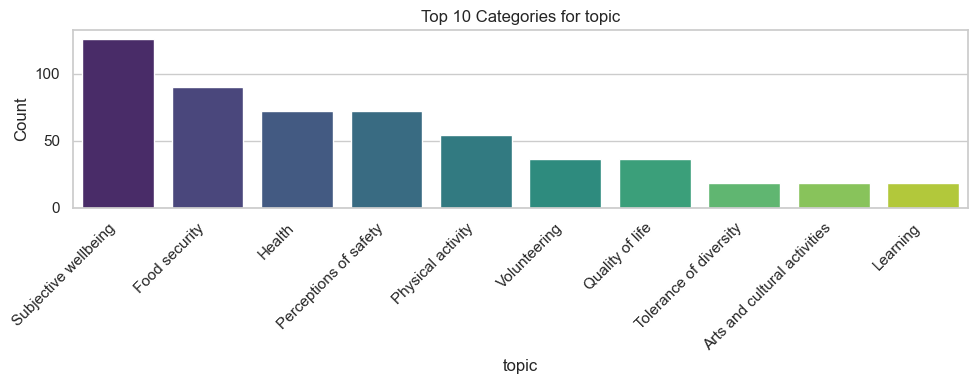

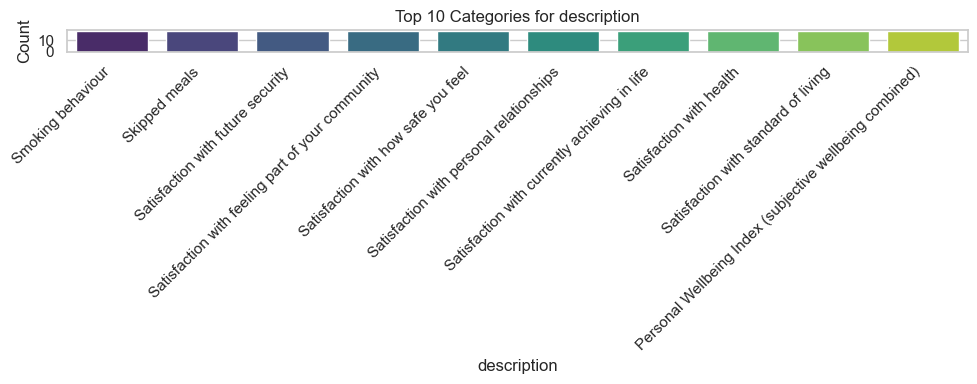

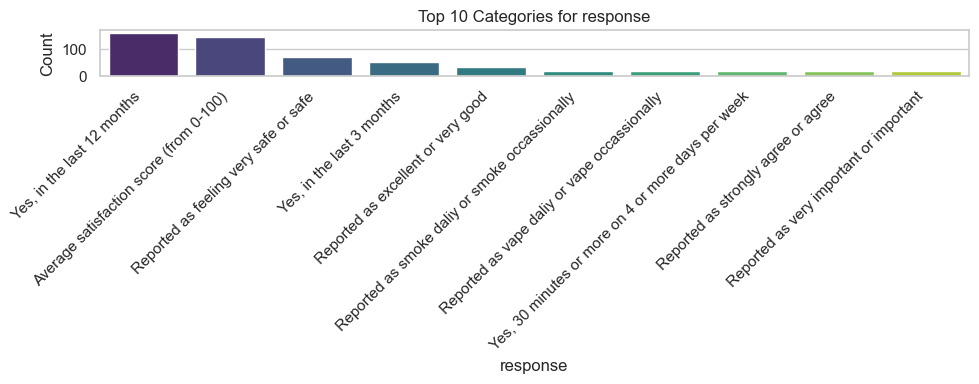

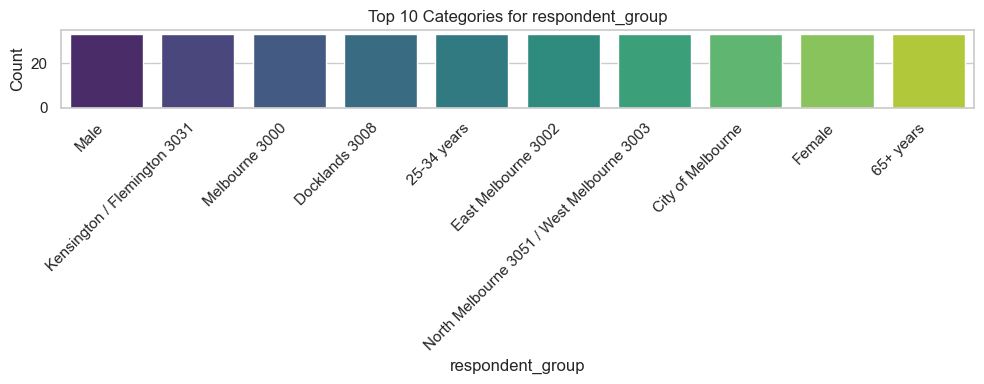

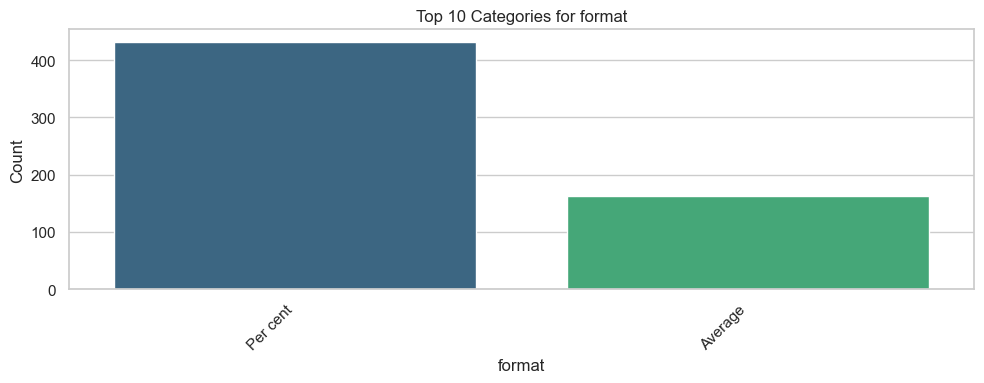

In [237]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    top_values = df[col].value_counts().nlargest(10)
    order = top_values.index
    # Use hue, but then remove the legend to avoid clutter.
    ax = sns.barplot(x=top_values.index, y=top_values.values, hue=top_values.index, order=order, palette="viridis")
    plt.title(f"Top 10 Categories for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    plt.tight_layout()
    plt.show()


This code iterates over every categorical column in your dataset to generate individual bar plots for the top 10 most frequent values in each column. For each column, it first creates a new figure with dimensions of 10 by 4 inches, then computes the frequency of each unique value using `value_counts()` and selects the 10 most common values with `nlargest(10)`, preserving their order. A bar plot is generated using Seaborn’s `barplot` function, where the x-axis displays the category names and the y-axis displays their corresponding counts; the `hue` parameter is also set to the same category values to apply the "viridis" color palette, although this results in a redundant legend that is subsequently removed if present. The plot is enhanced with a dynamic title that includes the column name, appropriate x and y labels, and the x-axis labels are rotated by 45 degrees and right-aligned for better readability. Finally, `plt.tight_layout()` ensures that all elements fit neatly within the figure before the plot is rendered with `plt.show()`.